In [12]:
import time

import numpy as np
import matplotlib.pyplot as plt


## Parameters

In [2]:
# num harmonics
n = 14
# max frequency
w_max = 1800
# num model steps
N = 256

random_seed = 100

In [3]:
def generate_signal(n, w_max, N, max_A=1.0, print_info=True):
    """
    Generate random signal.
    
    :param int n: number of harmonics.
    :param float w_max: maximum frequency.
    :param int N: number of generation steps.
    :param float max_A: max amplitude of individual harmonics.
    :param boolean print_info: whether to print frequences,
                               amplitudes and phases of harmonics.
    :return np.ndarray result_signal: shape = (N, )
    
    """    
    w_step = w_max / n
    w = np.array([i * w_step for i in range(1, n + 1)])
    w.resize((n, 1))
    
    # generate amplitudes and phases
    amplitudes = np.random.random((n, 1)) * max_A
    phases = np.random.randint(-15, 15, size=(n, 1))
    harmonics = [np.linspace(0, N, num=N) for i in range(n)]
    harmonics = np.array(harmonics)
    
    harmonics = amplitudes * np.sin(w * harmonics + phases)
    result_signal = harmonics.sum(axis=0, keepdims=False)
    
    if print_info:
        print("Frequencies: \n", w)
        print("Amplitudes :\n", amplitudes)
        print("Phases :\n", phases)
    
    return result_signal
    

## Calculations 

In [4]:
# np.random.seed(random_seed)
signal_x = generate_signal(n, w_max, N, print_info=False)

In [5]:
# np.random.seed(random_seed)
signal_y = generate_signal(n, w_max, N, print_info=False)

In [6]:
%%time

mean = signal_x.mean()
print(mean)

-0.003042910774903927
Wall time: 0 ns


In [7]:
%%time

dispersion = signal_x.std() ** 2
print(dispersion)

2.1761884078765723
Wall time: 0 ns


## Graphs

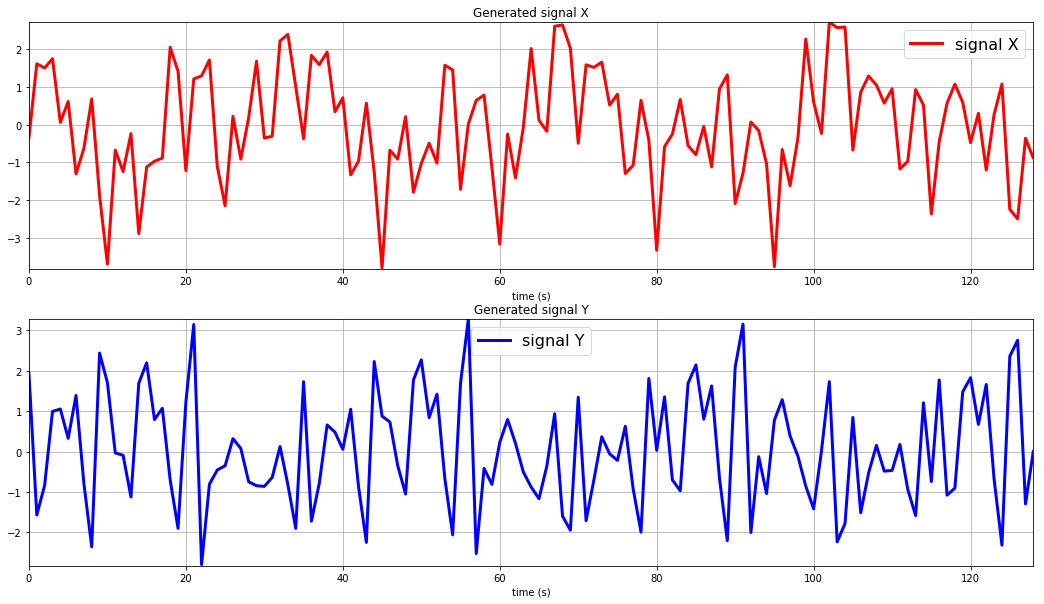

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))

ax[0].plot(signal_x, color=(1, 0, 0), linewidth=3, ls="-")
ax[0].set(title="Generated signal X", xlabel="time (s)")
ax[0].legend(["signal X"], fontsize=16, loc=0)
ax[0].grid()
ax[0].set(xlim=[0, N/2], ylim=[signal_x.min(), signal_x.max()])

ax[1].plot(signal_y, color=(0, 0, 1), linewidth=3, ls="-")
ax[1].set(title="Generated signal Y", xlabel="time (s)")
ax[1].legend(["signal Y"], fontsize=16, loc=0)
ax[1].grid()
ax[1].set(xlim=[0, N/2], ylim=[signal_y.min(), signal_y.max()])


plt.show()

### Correlation

In [9]:
def correlation(signal1, signal2, tau):
    """
    :param np.ndarray signal1, signal2: 1-D arrays of equal lenght.
    :param int tau: time shift, must be less then number of gen steps.
    :return float:
    
    """
    mean1 = signal1.mean()
    mean2 = signal2.mean()
    signal1 = signal1[0: signal1.shape[0] - tau]
    signal2 = signal2[tau: ]
    
    try:
        corr = np.sum((signal1 - mean1) * (signal2 - mean2)) / (signal1.shape[0] - 1)
    except ValueError:
        print(ValueError, "Signals must have same lenght!")
        return None
    
    return corr
    
def correlation_function(signal1, signal2, tau_range):
    """
    :param np.ndaray signal1, singnal2: 1-D arrays of equal lenght.
    :param list of int tau_range:
    :return np.ndarray: 1-D array.
    
    """
    corr_func = np.zeros((len(tau_range, )))
    for i, tau in enumerate(tau_range):
        corr_func[i] = correlation(signal1, signal2, tau)
        
    return corr_func
        

In [10]:
autocorr_func_x = correlation_function(signal_x, signal_x, range(0, N-1))
autocorr_func_y = correlation_function(signal_y, signal_y, range(0, N-1))
corr_func_x_y = correlation_function(signal_x, signal_y, range(0, N-1))


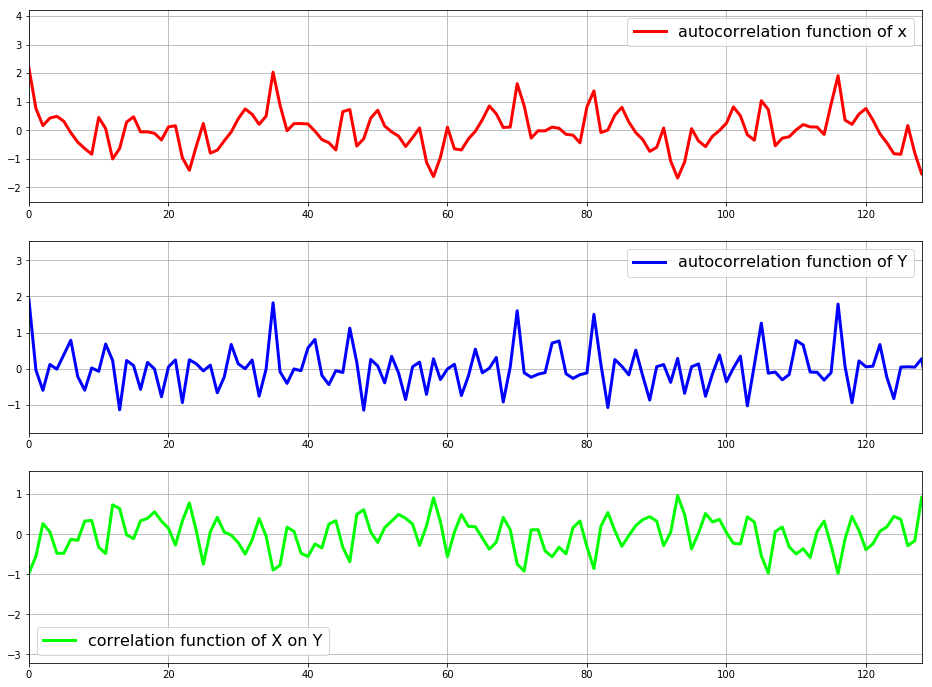

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))

ax[0].plot(autocorr_func_x, color=(1, 0, 0), linewidth=3, ls="-")
# ax[0].set(title="Generated signal X", xlabel="time (s)")
ax[0].legend(["autocorrelation function of x"], fontsize=16, loc=0)
ax[0].grid()
ax[0].set(xlim=[0, N/2], ylim=[autocorr_func_x.min(), autocorr_func_x.max()])

ax[1].plot(autocorr_func_y, color=(0, 0, 1), linewidth=3, ls="-")
# ax[1].set(title="Generated signal Y", xlabel="time (s)")
ax[1].legend(["autocorrelation function of Y"], fontsize=16, loc=0)
ax[1].grid()
ax[1].set(xlim=[0, N/2], ylim=[autocorr_func_y.min(), autocorr_func_y.max()])

ax[2].plot(corr_func_x_y, color=(0, 1, 0), linewidth=3, ls="-")
# ax[2].set(title="Generated signal Y", xlabel="time (s)")
ax[2].legend(["correlation function of X on Y"], fontsize=16, loc=0)
ax[2].grid()
ax[2].set(xlim=[0, N/2], ylim=[corr_func_x_y.min(), corr_func_x_y.max()])

plt.show()

### Additional

In [46]:
%%time

time_xx = []
time_xy = []

for i in range(5, N * 2, 1):
    start_time = time.time()
    x = generate_signal(n, w_max, i, print_info=False)
    corr_func_x = correlation_function(x, x, range(0, i-1))
    end_time = time.time()
    time_xx.append(end_time - start_time)
    
    start_time = time.time()
    x = generate_signal(n, w_max, i, print_info=False)
    y = generate_signal(n, w_max, i, print_info=False)
    corr_func_x = correlation_function(x, y, range(0, i-1))
    end_time = time.time()
    time_xy.append(end_time - start_time)
    

Wall time: 12.1 s


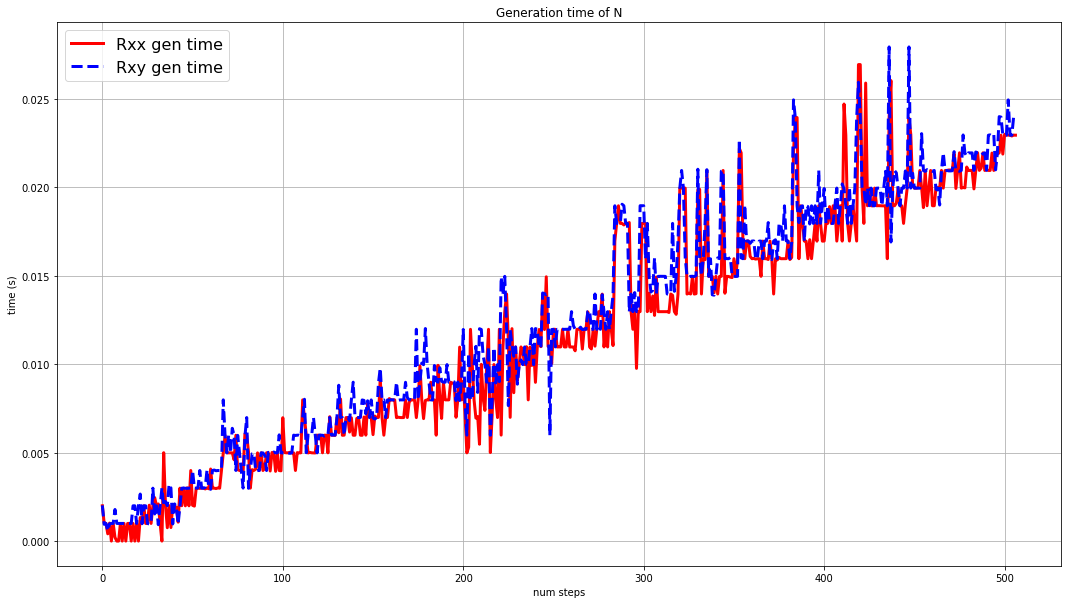

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

ax.plot(time_xx, color=(1, 0, 0), linewidth=3, ls="-", label="Rxx gen time")
ax.plot(time_xy, color=(0, 0, 1), linewidth=3, ls="--", label="Rxy gen time")
ax.set(title="Generation time of N", xlabel="num steps", ylabel="time (s)")
ax.legend(fontsize=16, loc=0)
ax.grid()
#ax.set(xlim=[0, N], ylim=[signal_x.min(), signal_x.max()])

plt.show()